In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In /home/pipe11/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pipe11/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pipe11/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/pipe11/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pipe11/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
corpus = pd.read_csv('../data/corpus_spanish_v3.csv', index_col = 0)

In [3]:
corpus.head()

Category     Topic                      Source  \
0     True   Science                     El país   
1     True   Economy               El financiero   
2     Fake     Sport  actualidadpanamericana.com   
3     Fake  Politics  actualidadpanamericana.com   
4     Fake  Politics  actualidadpanamericana.com   

                                            Headline  \
0  La NASA recupera el contacto con un satélite d...   
1  AMLO aceleraría el consumo y el crecimiento ec...   
2  Compañero de James se ‘calvea’ y le juega pesa...   
3  Dian gravará este año a los niños que recojan ...   
4         Uribe asegura que insultó 358 guerrilleros   

                                                Text  \
0  La NASA recupera el contacto con un satélite d...   
1  AMLO aceleraría el consumo y el crecimiento ec...   
2  Al borde de un colapso nervioso quedó el hábil...   
3  Mediante pupitrazo de último minuto anoche, el...   
4  Muy temprano esta mañana el expresidente y aho...   

                                                Link  
0  https://elpais.com/elpais/2018/02/01/ciencia/1...  
1  http://www.elfinanciero.com.mx/economia/amlo-a...  
2  http://www.actualidadpanamericana.com/companer...  
3  http://www.actualidadpanamericana.com/dian-gra...  
4  http://www.actualidadpanamericana.com/uribe-as...

In [6]:
corpus_fake.groupby('Source').size().sort_values(ascending = False)

Source
actualidadpanamericana.com    1278
El Dizque                      135
beforeitsnews.com              125
El Ruinaversal                  94
elmundotoday.com                45
                              ... 
PAN tweet                        1
Parabólica                       1
PlayGroundMag                    1
Publimetro                       1
20 Minutos                       1
Length: 91, dtype: int64

Checking values types

In [4]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 3973
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  3974 non-null   object
 1   Topic     3974 non-null   object
 2   Source    3974 non-null   object
 3   Headline  3974 non-null   object
 4   Text      3974 non-null   object
 5   Link      3974 non-null   object
dtypes: object(6)
memory usage: 217.3+ KB


Checking if there are NA Values

In [5]:
corpus.isnull().sum()

Category    0
Topic       0
Source      0
Headline    0
Text        0
Link        0
dtype: int64

Number of news per Category 'Fake' and 'True'

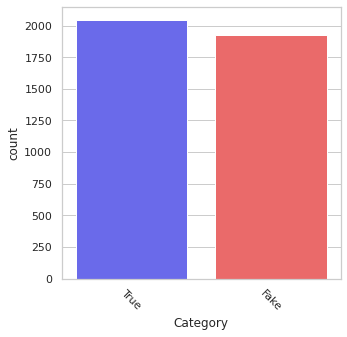

In [78]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
ax = sns.countplot(x = 'Category', data = corpus, palette = 'seismic')
sticks = plt.xticks(rotation = -45)

### Total news in the corpus per Topic

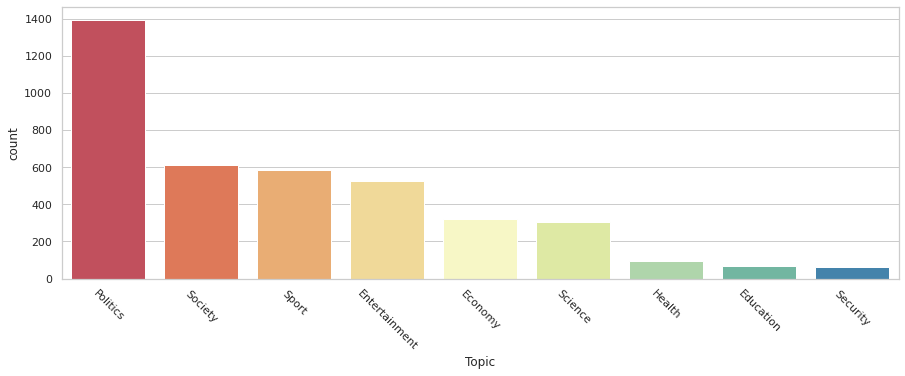

In [75]:
plt.figure(figsize = (15,5))
sns.set(style = 'whitegrid')
ax = sns.countplot(x = 'Topic' , order = corpus['Topic'].value_counts().index, data = corpus, palette = 'Spectral')
sticks = plt.xticks(rotation = -45)

### Fake news and True news per topic

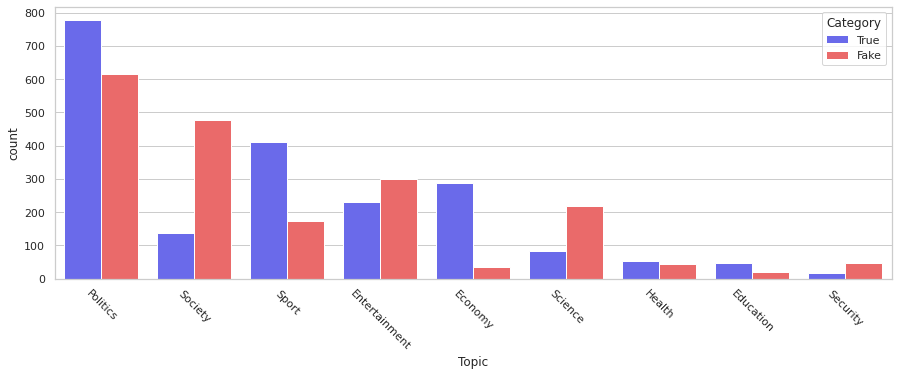

In [73]:
plt.figure(figsize = (15,5))
sns.set(style = 'whitegrid')
ax = sns.countplot(x = 'Topic' , order = corpus['Topic'].value_counts().index, hue = 'Category', data = corpus, 
                   palette = "seismic")
sticks = plt.xticks(rotation = -45)

### Wordcloud

In [ ]:
import nltk
from nltk.corpus import stopwords  
from nltk import word_tokenize  
from nltk.data import load  
from nltk.stem import SnowballStemmer  
from string import punctuation

<Figure size 432x288 with 0 Axes>

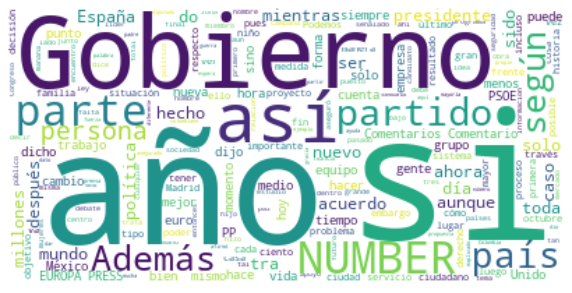

In [121]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

spanish_stopwords = stopwords.words('spanish')
text = " ".join(text for text in corpus.Text)

wordcloud = WordCloud(stopwords = spanish_stopwords, background_color = "white").generate(text)
plt.figure()
plt.figure(figsize = [10, 10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0 , y = 0)
plt.show()

<Figure size 432x288 with 0 Axes>

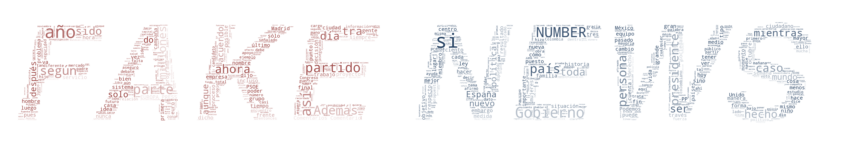

In [132]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

spanish_stopwords = stopwords.words('spanish')
text_fake = " ".join(text for text in corpus[corpus['Category'] == 'Fake'].Text)

mask = np.array(Image.open('../imgs/FAKE_NEWS_title.png'))
wordcloud_fake = WordCloud(stopwords = spanish_stopwords, background_color = 'white', mode = 'RGBA',max_words = 1000,
                           mask = mask).generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure()
plt.figure(figsize = [15, 15])
plt.imshow(wordcloud_fake.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis("off")
plt.margins(x = 0 , y = 0)
plt.show()

### Boxplots with features extracted

In [81]:
df_features = pd.read_csv('../data/spanish_corpus_features_v6.csv')

df_features.columns

Index(['topic', 'text', 'headline', 'words_h', 'word_size_h',
       'avg_syllables_word_h', 'unique_words_h', 'ttr_h', 'mltd_h', 'sents',
       'words', 'avg_words_sent', 'avg_word_size', 'avg_syllables_word',
       'unique_words', 'ttr', 'mltd', 'huerta_score', 'szigriszt_score',
       'upper_case_ratio', 'entity_ratio', 'quotes', 'quotes_ratio',
       'propn_ratio', 'noun_ratio', 'adp_ratio', 'det_ratio', 'punct_ratio',
       'pron_ratio', 'verb_ratio', 'adv_ratio', 'sym_ratio', 'label'],
      dtype='object')

<AxesSubplot:xlabel='Text stylometric features', ylabel='value'>

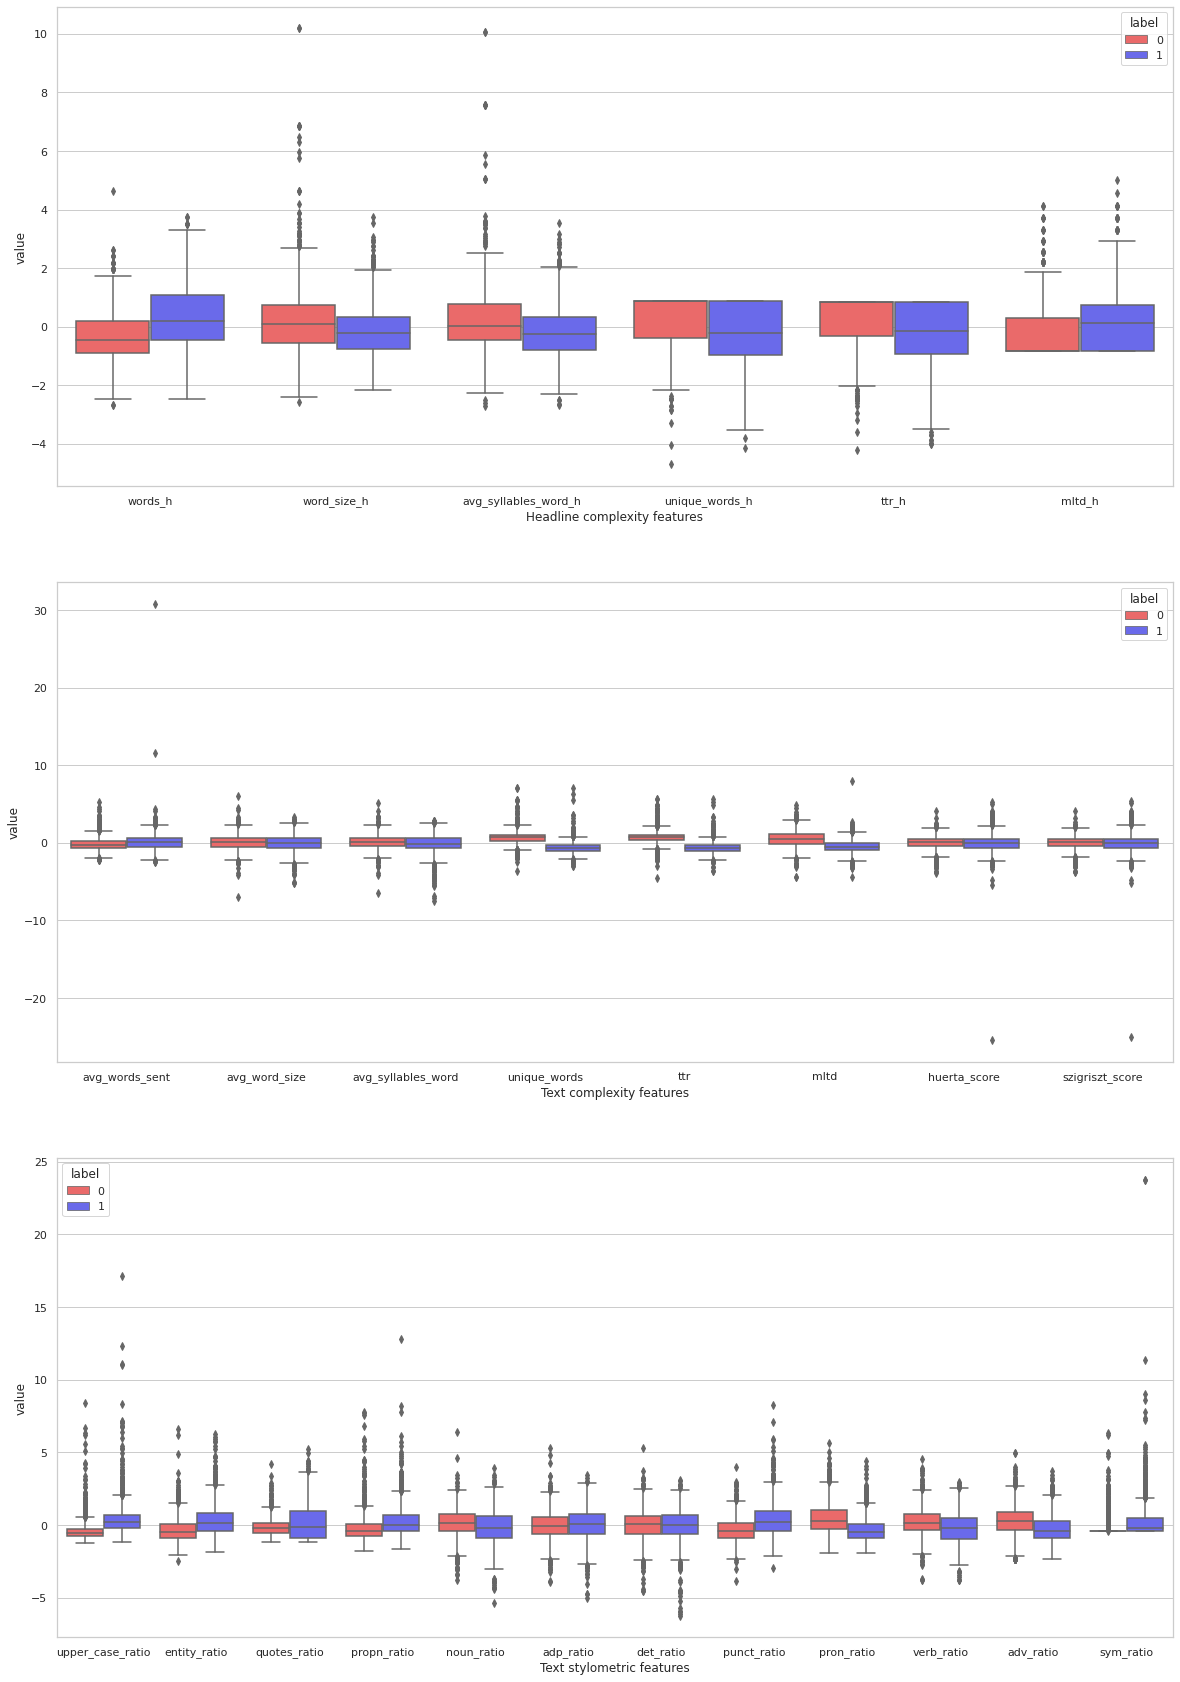

In [74]:
df_features = pd.read_csv('../data/spanish_corpus_features_v6.csv')

import seaborn as sns
from matplotlib import pyplot as plt

# All features don't fit well in 1 graphic so we divide it in 3 graphics

features1 = ['words_h', 'word_size_h','avg_syllables_word_h', 'unique_words_h', 
             'ttr_h', 'mltd_h']

features2 = ['avg_words_sent', 'avg_word_size', 'avg_syllables_word', 'unique_words', 
             'ttr', 'mltd', 'huerta_score', 'szigriszt_score']

features3 = ['upper_case_ratio', 'entity_ratio', 'quotes_ratio', 'propn_ratio', 
             'noun_ratio', 'adp_ratio', 'det_ratio', 'punct_ratio', 'pron_ratio', 'verb_ratio', 'adv_ratio', 
             'sym_ratio']

y = df_features['label']
x1 = df_features[features1]
x2 = df_features[features2]
x3 = df_features[features3]

# standarization
x1_st = (x1 - x1.mean()) / (x1.std())
x2_st = (x2 - x2.mean()) / (x2.std())
x3_st = (x3 - x3.mean()) / (x3.std())

data1 = pd.concat([y, x1_st.iloc[:,]], axis = 1)
data1 = pd.melt(data1, id_vars = "label", var_name = "Headline complexity features", value_name = 'value')

data2 = pd.concat([y, x2_st.iloc[:,]], axis = 1)
data2 = pd.melt(data2, id_vars = "label", var_name = "Text complexity features", value_name = 'value')

data3 = pd.concat([y, x3_st.iloc[:,]], axis = 1)
data3 = pd.melt(data3, id_vars = "label", var_name = "Text stylometric features", value_name = 'value')

f, axs = plt.subplots(3, figsize = (20, 30))

sns.boxplot(x = "Headline complexity features", y = "value", hue = "label", data = data1, ax = axs[0], palette = "seismic_r")
sns.boxplot(x = "Text complexity features", y = "value", hue = "label", data = data2, ax = axs[1], palette = "seismic_r")
sns.boxplot(x = "Text stylometric features", y = "value", hue = "label", data = data3, ax = axs[2], palette = "seismic_r")

## Features correlation heatmap

<AxesSubplot:>

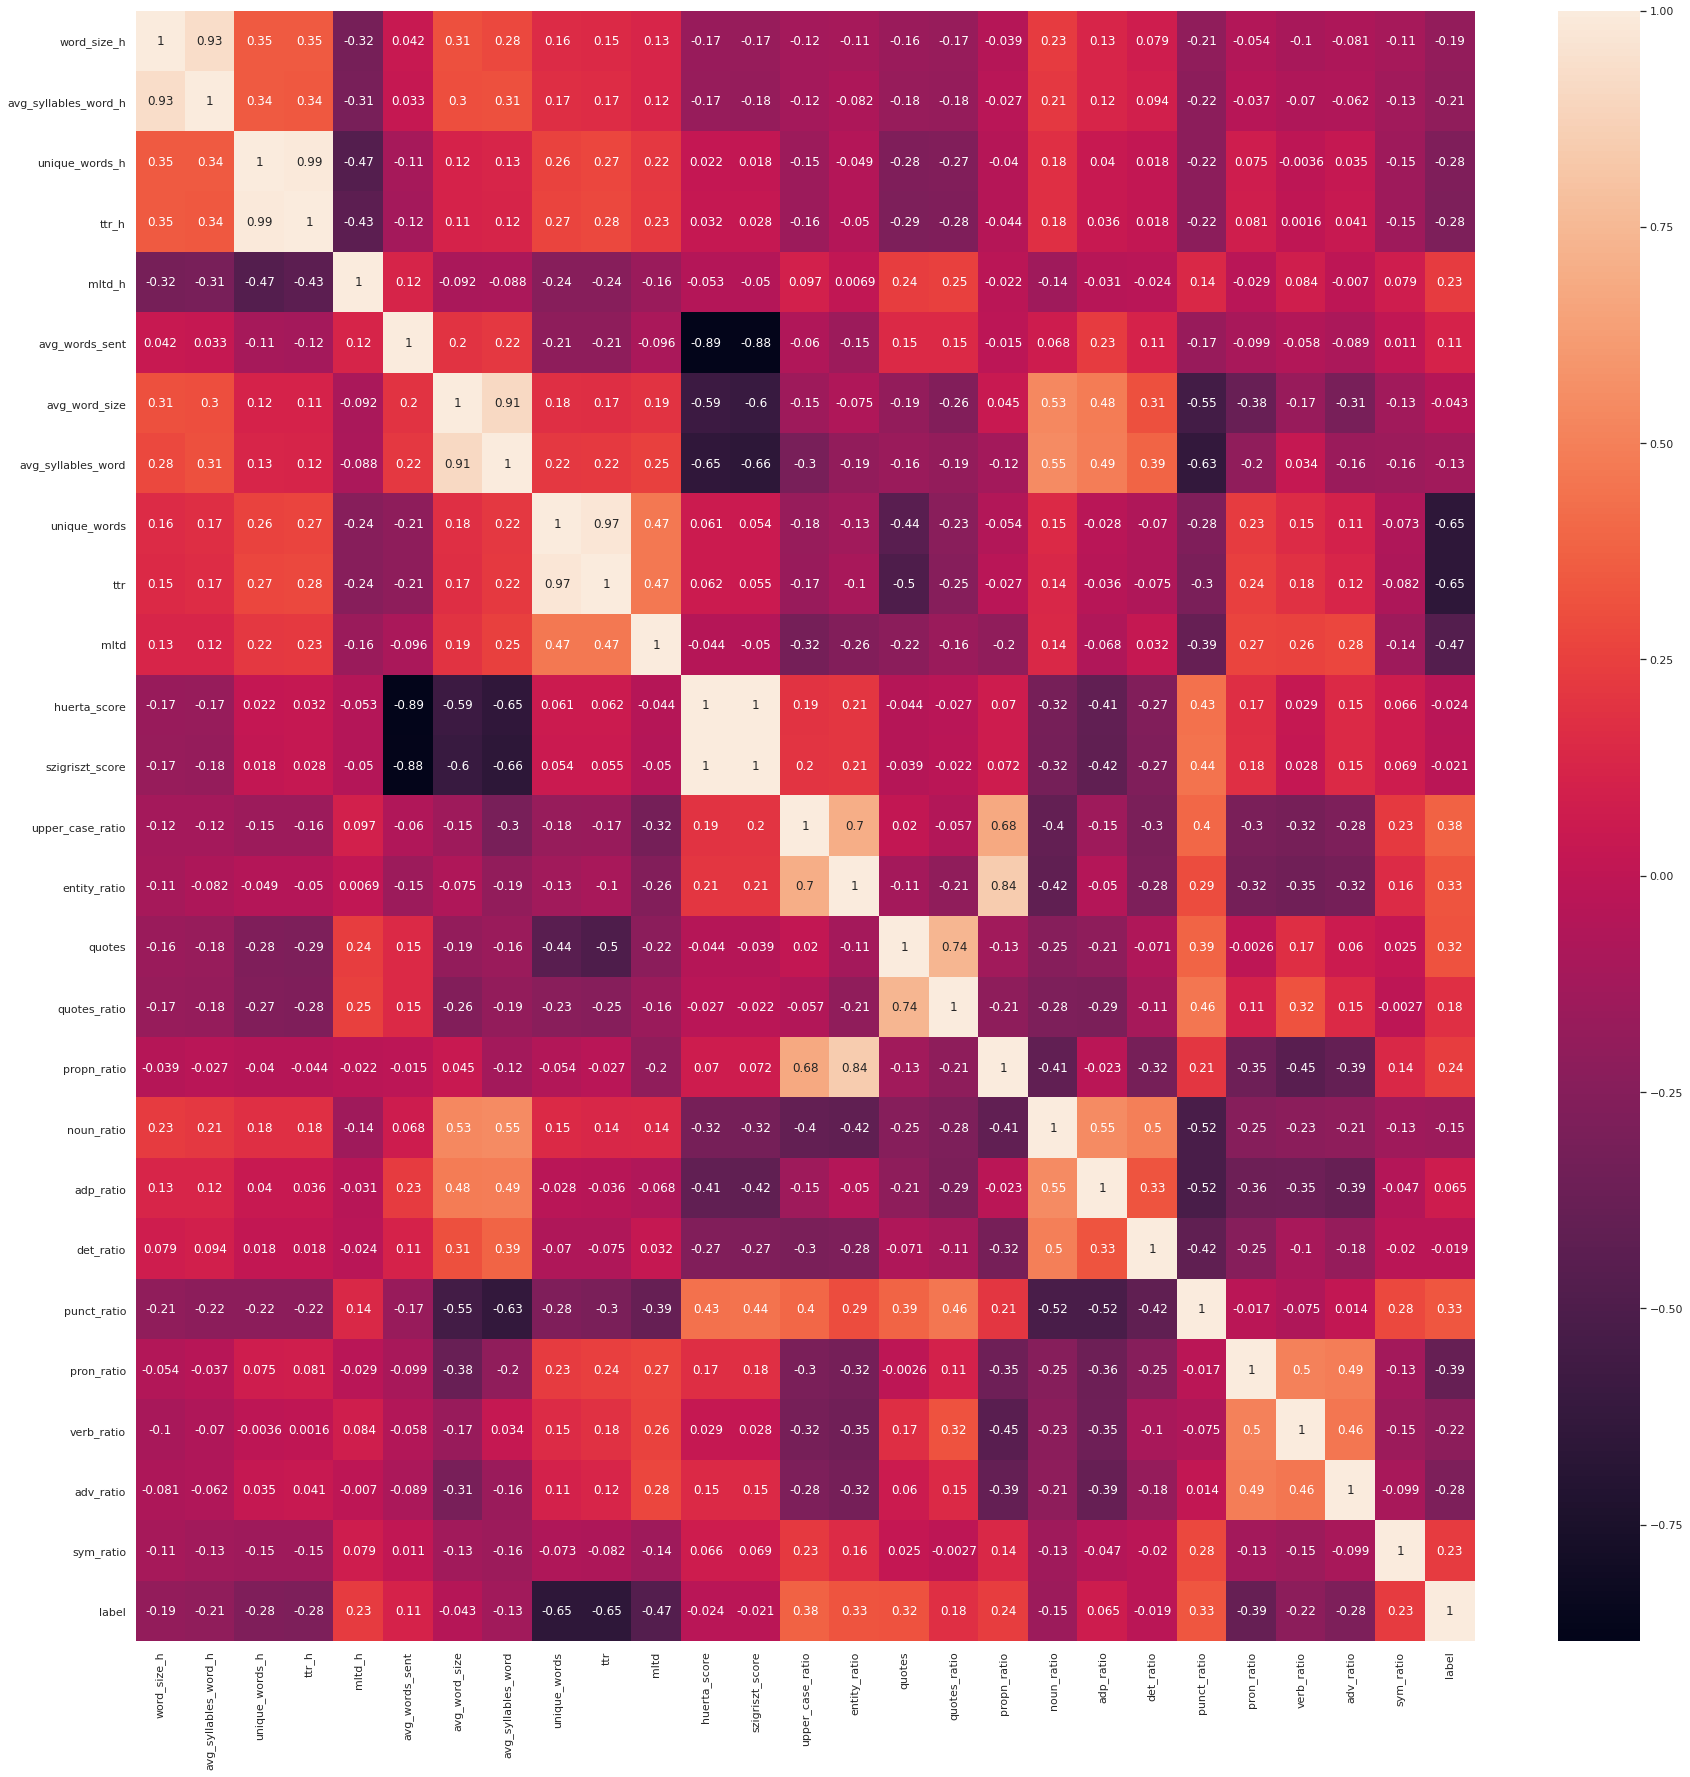

In [89]:
features = ['word_size_h', 'avg_syllables_word_h', 'unique_words_h', 'ttr_h', 'mltd_h', 'avg_words_sent', 
            'avg_word_size', 'avg_syllables_word', 'unique_words', 'ttr', 'mltd', 'huerta_score', 'szigriszt_score',
            'upper_case_ratio', 'entity_ratio', 'quotes', 'quotes_ratio', 'propn_ratio', 'noun_ratio', 'adp_ratio', 
            'det_ratio', 'punct_ratio', 'pron_ratio', 'verb_ratio', 'adv_ratio', 'sym_ratio', 'label']

correlation = df_features[features].corr()

plt.figure(figsize = (30, 30))
sns.heatmap(correlation, annot = True, )
# x_sticks = plt.xticks(rotation = -45)

## Feature univariate distribution

In [152]:
features = ['word_size_h', 'avg_syllables_word_h', 'unique_words_h', 'ttr_h', 'mltd_h', 'avg_words_sent', 
            'avg_word_size', 'avg_syllables_word', 'unique_words', 'ttr', 'mltd', 'huerta_score', 'szigriszt_score',
            'upper_case_ratio', 'entity_ratio', 'quotes_ratio', 'propn_ratio', 'noun_ratio', 'adp_ratio', 
            'det_ratio', 'punct_ratio', 'pron_ratio', 'verb_ratio', 'adv_ratio', 'sym_ratio']

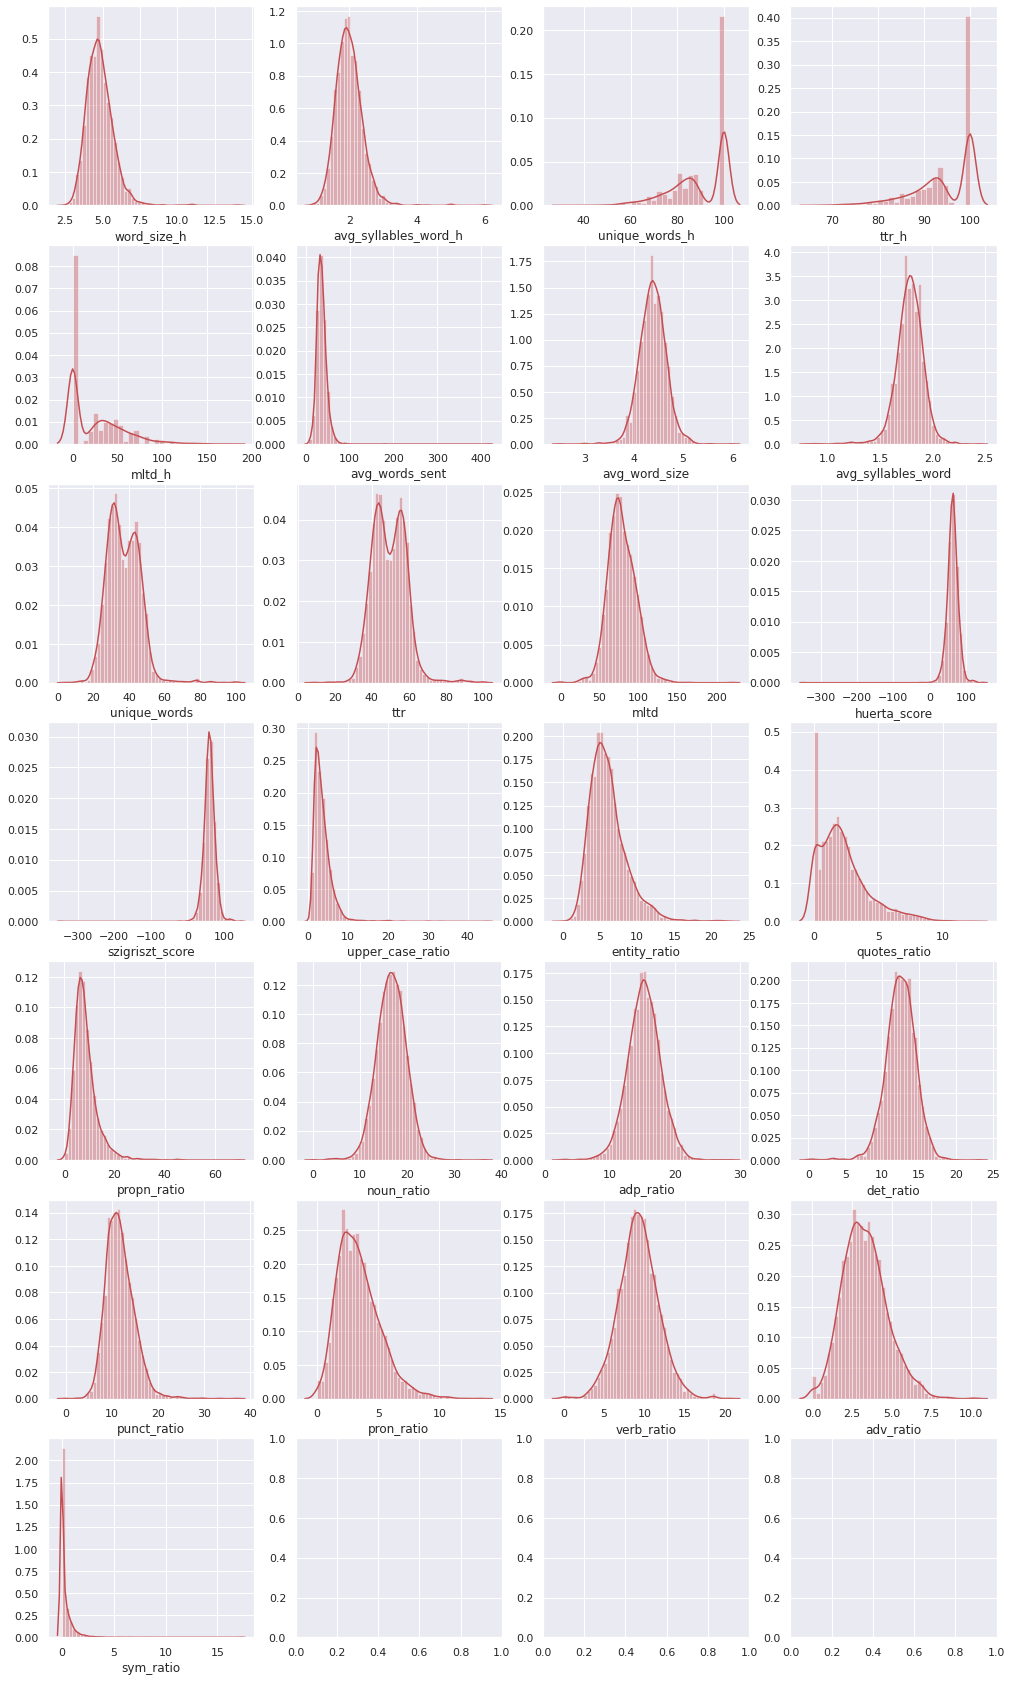

In [153]:
f, axes = plt.subplots(7, 4, figsize = (17, 30))
for ax, feature in zip(axes.flat, features):
    sns.distplot(df_features[feature], ax = ax, color = 'r')

In [161]:
df_features[headline_complexity_features_label]

word_size_h  avg_syllables_word_h  unique_words_h   ttr_h  mltd_h  label
0            5.38                  2.50           87.50   93.75   71.68      1
1            5.27                  2.55           81.82   90.91   33.88      1
2            3.75                  1.67          100.00  100.00    0.00      0
3            4.58                  1.92          100.00  100.00    0.00      0
4            6.17                  2.50          100.00  100.00    0.00      0
...           ...                   ...             ...     ...     ...    ...
3969         5.10                  2.30           80.00   90.00   28.00      1
3970         4.73                  2.00           81.82   90.91   33.88      1
3971         7.67                  3.00          100.00  100.00    0.00      0
3972         5.44                  2.33          100.00  100.00    0.00      0
3973         3.68                  1.47           89.47   94.74  101.08      1

[3974 rows x 6 columns]

## Feature multivariate distribution

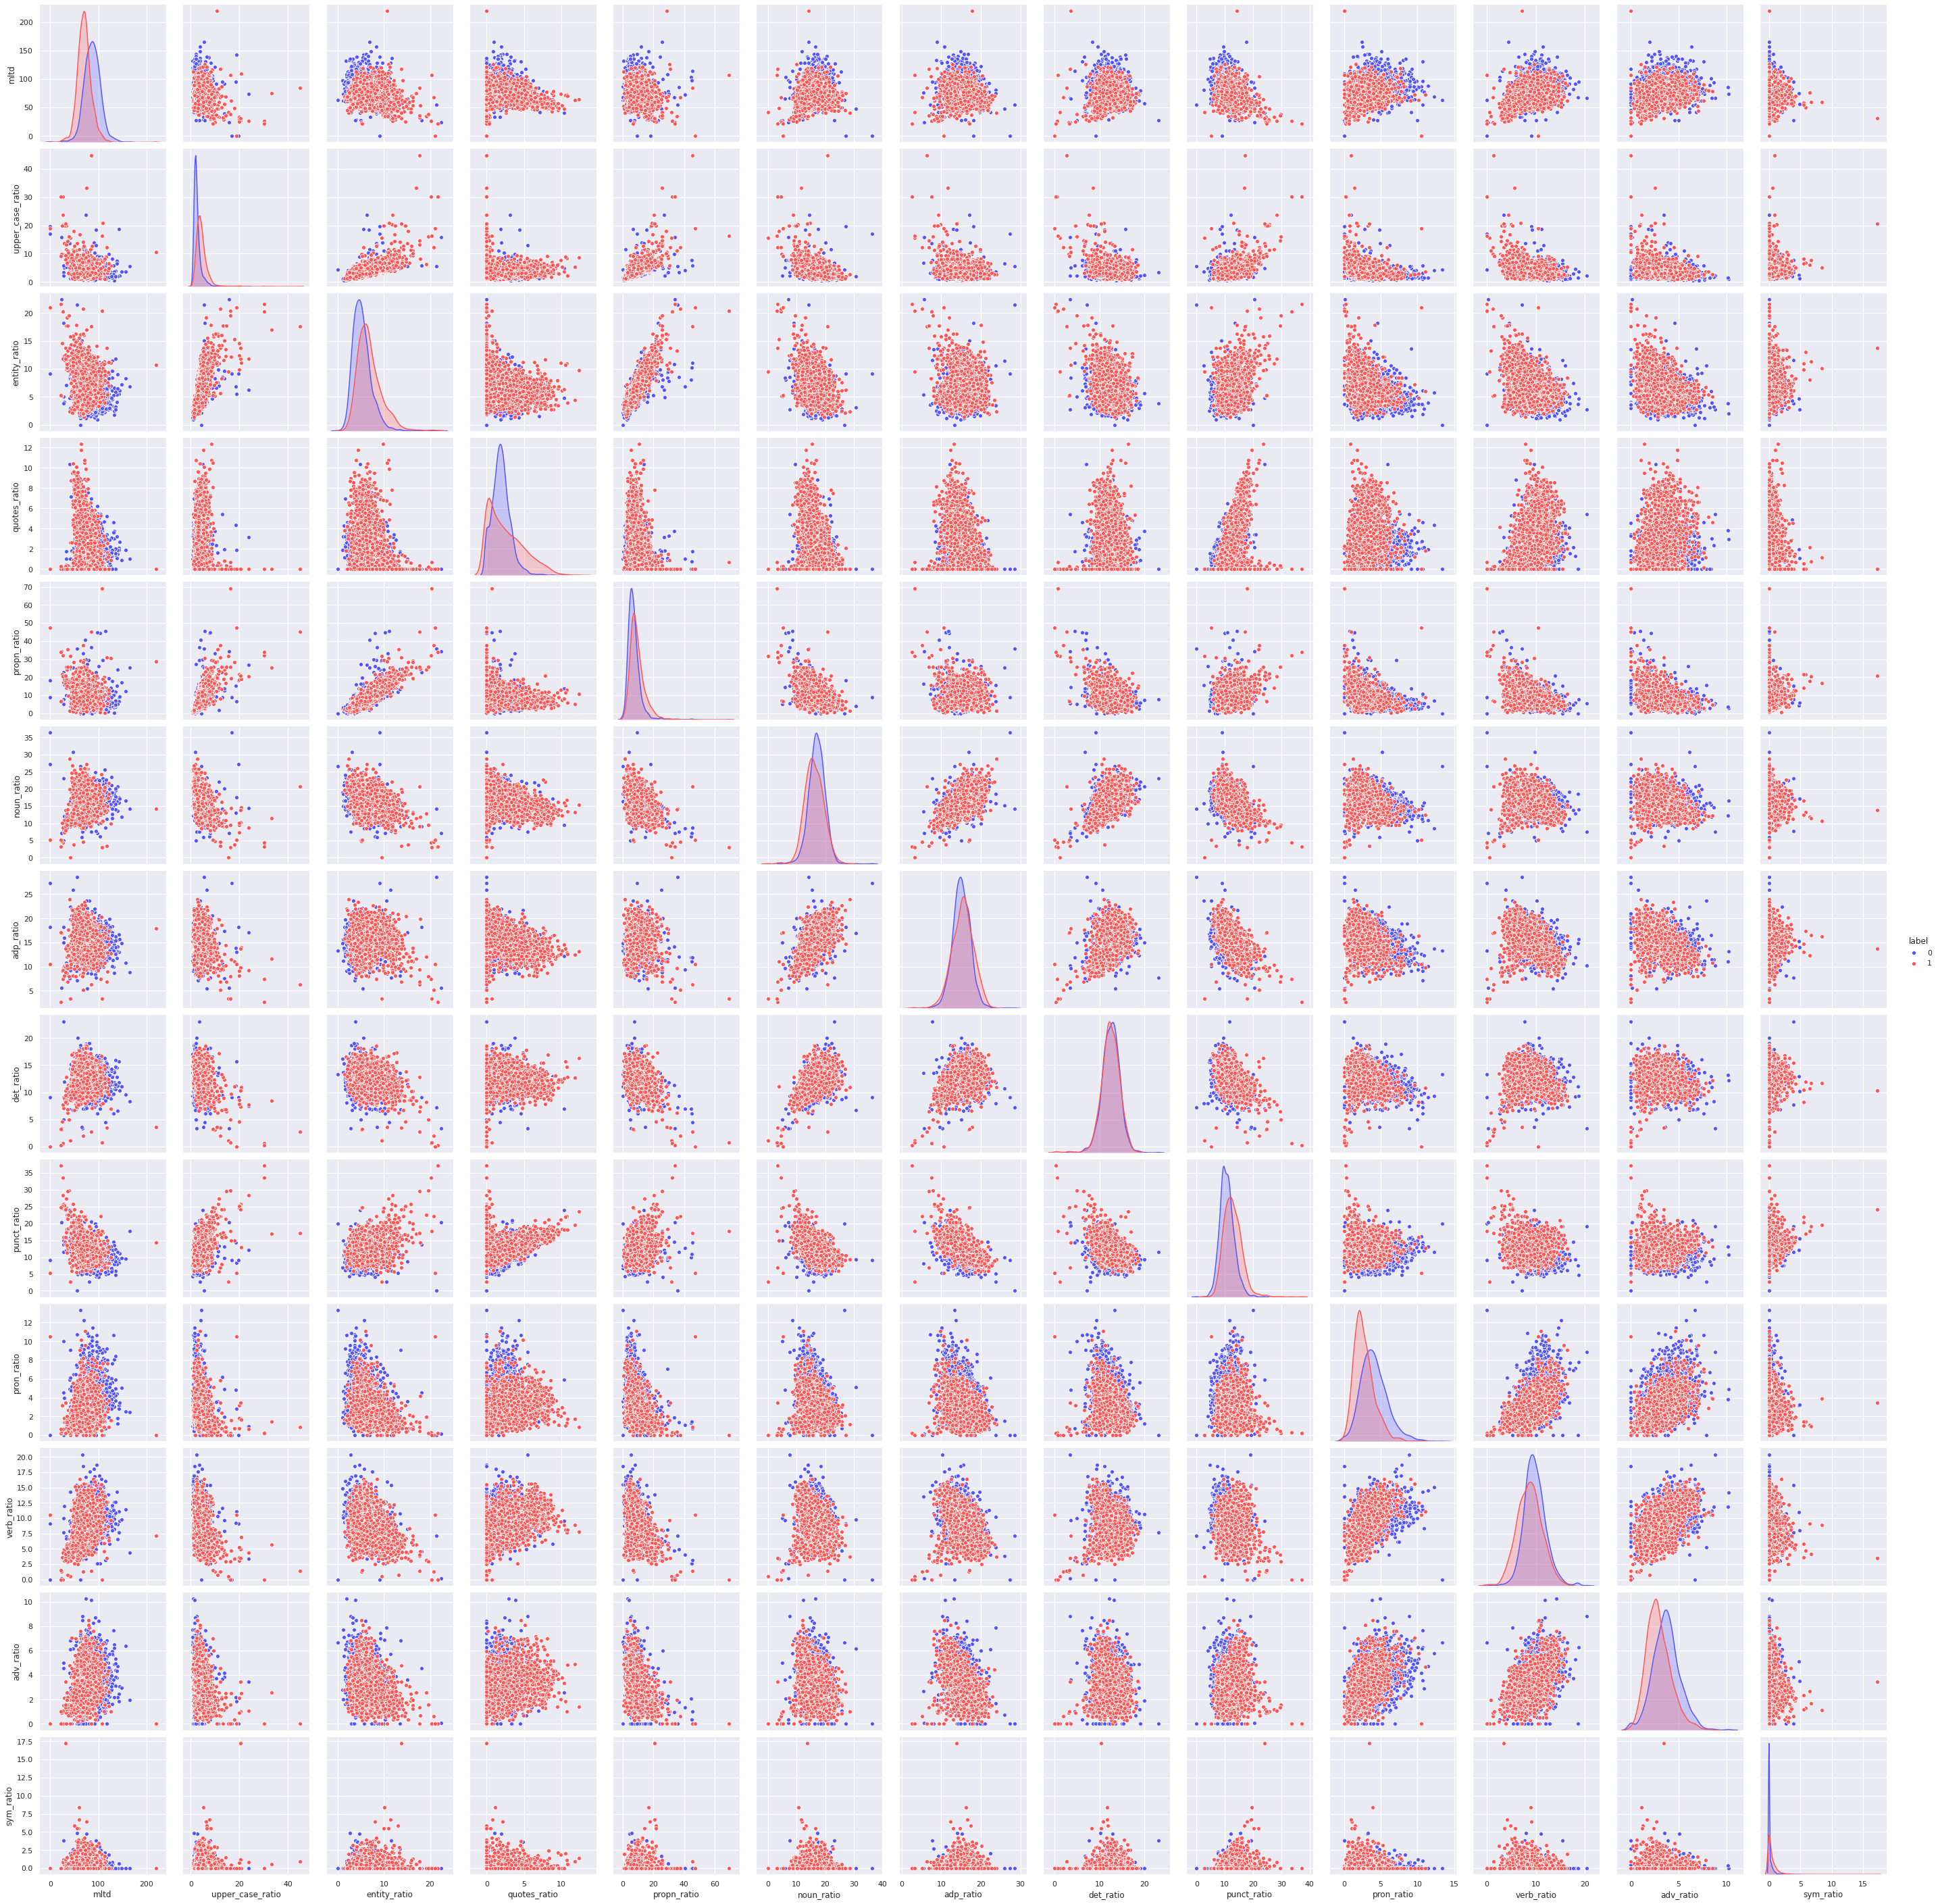

In [163]:
headline_complexity_features_label = ['word_size_h', 'avg_syllables_word_h', 'unique_words_h', 'ttr_h', 'mltd_h', 'label']

text_complexity_features_label = ['avg_words_sent', 'avg_word_size', 'avg_syllables_word', 'unique_words', 'ttr',
                                  'huerta_score', 'szigriszt_score', 'label']

text_stylometric_features_label = ['mltd', 'upper_case_ratio', 'entity_ratio', 'quotes_ratio', 'propn_ratio', 'noun_ratio', 
                                   'adp_ratio', 'det_ratio', 'punct_ratio', 'pron_ratio', 'verb_ratio', 'adv_ratio', 
                                   'sym_ratio', 'label']

sns.pairplot(df_features[text_stylometric_features_label], height = 3, hue = 'label', palette = 'seismic');

## Principal Component Analysis (PCA) 2D plot

In [166]:
df_features

topic                                               text  \
0       Science  la nasa recupera el contacto con un satélite d...   
1       Economy  amlo aceleraría el consumo y el crecimiento ec...   
2         Sport  al borde de un colapso nervioso quedó el hábil...   
3      Politics  mediante pupitrazo de último minuto anoche, el...   
4      Politics  muy temprano esta mañana el expresidente y aho...   
...         ...                                                ...   
3969      Sport  fifa levanta sanción a messi para regresar a l...   
3970  Education  el debate sobre los deberes llega al congreso ...   
3971    Society  como un paso decisivo en la descongestión judi...   
3972    Science  muy preocupada se declaró la secretaría de sal...   
3973   Politics  el portavoz del grupo parlamentario del partid...   

                                               headline  words_h  word_size_h  \
0     la nasa recupera el contacto con un satélite d...       16         5.38   
1     amlo aceleraría el consumo y el crecimiento ec...       11         5.27   
2     compañero de james se ‘calvea’ y le juega pesa...       12         3.75   
3     dian gravará este año a los niños que recojan ...       12         4.58   
4            uribe asegura que insultó 358 guerrilleros        6         6.17   
...                                                 ...      ...          ...   
3969  fifa levanta sanción a messi para regresar a l...       10         5.10   
3970  el debate sobre los deberes llega al congreso ...       11         4.73   
3971  tuiteros emberracados podrán juzgar algunos de...        6         7.67   
3972  ojear pantallas ajenas en transmilenio ya es u...        9         5.44   
3973  aliaga (par): el gobierno de lambán es "débil"...       19         3.68   

      avg_syllables_word_h  unique_words_h   ttr_h  mltd_h  sents  ...  \
0                     2.50           87.50   93.75   71.68     16  ...   
1                     2.55           81.82   90.91   33.88      5  ...   
2                     1.67          100.00  100.00    0.00     13  ...   
3                     1.92          100.00  100.00    0.00      8  ...   
4                     2.50          100.00  100.00    0.00      9  ...   
...                    ...             ...     ...     ...    ...  ...   
3969                  2.30           80.00   90.00   28.00      7  ...   
3970                  2.00           81.82   90.91   33.88     24  ...   
3971                  3.00          100.00  100.00    0.00      9  ...   
3972                  2.33          100.00  100.00    0.00     19  ...   
3973                  1.47           89.47   94.74  101.08     15  ...   

      propn_ratio  noun_ratio  adp_ratio  det_ratio  punct_ratio  pron_ratio  \
0            5.85       22.96      17.75      15.66         7.10        1.67   
1            9.22       22.82      15.53      16.50        11.17        0.49   
2            7.88       16.03      15.22      13.32        13.32        4.35   
3            3.72       21.56      19.33      15.24        10.04        0.74   
4            7.31       15.77       8.46      10.77        20.00        5.38   
...           ...         ...        ...        ...          ...         ...   
3969        11.99       15.79      19.30      15.20         8.77        2.63   
3970         7.05       17.28      14.96      14.77        13.80        1.45   
3971         2.68       21.25      15.66      11.41         9.84        3.36   
3972         5.68       14.11      14.74      10.95        12.00        7.58   
3973         8.81       14.10      13.62      12.34        17.63        1.12   

      verb_ratio  adv_ratio  sym_ratio  label  
0           8.56       3.76       0.00      1  
1           6.31       0.97       0.00      1  
2           8.15       3.53       0.54      0  
3           6.69       3.35       0.00      0  
4          10.38       5.00       0.77      0  
...          ...        ...        ...    ...  
3969      

In [207]:
round(pca.explained_variance_ratio_[0] * 100, 2)

22.99

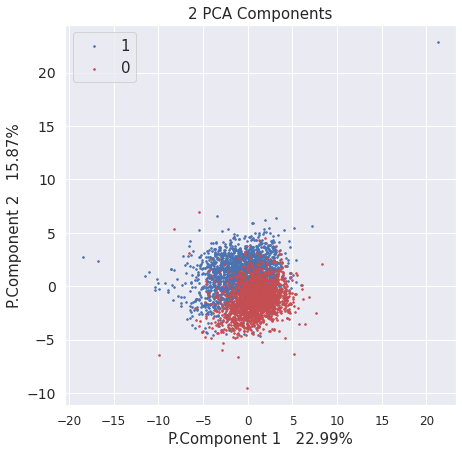

In [230]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['word_size_h', 'avg_syllables_word_h', 'unique_words_h', 'ttr_h', 'mltd_h', 'avg_words_sent', 
            'avg_word_size', 'avg_syllables_word', 'unique_words', 'ttr', 'mltd', 'huerta_score', 'szigriszt_score',
            'upper_case_ratio', 'entity_ratio', 'quotes', 'quotes_ratio', 'propn_ratio', 'noun_ratio', 'adp_ratio', 
            'det_ratio', 'punct_ratio', 'pron_ratio', 'verb_ratio', 'adv_ratio', 'sym_ratio']

X = df_features[features].values  
y = df_features['label'].values

# standard Scaling
sc = StandardScaler()  
X = sc.fit_transform(X) 

pca = PCA(n_components = 2) 
principalComponents = pca.fit_transform(X) 
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal_component_1', 'principal_component_2']) 
finalDf = pd.concat([principalDf, df_features[['label']]], axis = 1)

var_component1 = round(pca.explained_variance_ratio_[0] * 100, 2)
var_component2 = round(pca.explained_variance_ratio_[1] * 100, 2)

fig = plt.figure(figsize = (7, 7))  
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xlabel('P.Component 1   %.2f%%' % var_component1, fontsize = 15)  
plt.ylabel('P.Component 2   %.2f%%' % var_component2, fontsize = 15)  
plt.title('2 PCA Components', fontsize = 15) 

targets = [1, 0] 
colors = ['b','r']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['label'] == target 
    plt.scatter(finalDf.loc[indicesToKeep, 'principal_component_1'], 
                finalDf.loc[indicesToKeep, 'principal_component_2'], c = color, s = 10, marker = ".")


plt.legend(targets,prop = {'size': 15})

In [238]:
print(corpus.loc[1705, 'Text'])

Esta es la clasificación del Gran Premio de Japón, decimonovena prueba del Mundial de Fórmula 1, y del Mundial de Pilotos y de Constructores. --CLASIFICACIÓN DEL GRAN PREMIO DE MÉXICO. 1. Lewis Hamilton (GBR/Mercedes) 1:40:31.402.
2. Nico Rosberg (ALE/Mercedes) a 00:08.354.
3. Sebastian Vettel (ALE/Ferrari) 00:17.313.
4. Daniel Ricciardo (AUS/Red Bull) 00:20.858.
5. Max Verstappen (HOL/Red Bull) 00:21.323.
6. Kimi Raikkonen (FIN/Ferrari) 00:49.376.
7. Nico Huelkenberg (ALE/Force India) 00:58.891.
8. Valtteri Bottas (FIN/Williams) 01:05.612.
9. Felipe Massa (BRA/Williams) 01:16.206.
10. Sergio Perez (MEX/Force India) 01:16.798.
11. Marcus Ericsson (SUE/Sauber) 1 vuelta.
12. Jenson Button (GBR/McLaren) 1 vuelta.
13. FERNANDO ALONSO (ESP/McLaren) 1 vuelta.
14. Jolyon Palmer (GBR/Renault) 1 vuelta.
15. Felipe Nasr (BRA/Sauber) 1 vuelta.
16. CARLOS SAINZ (ESP/Toro Rosso) 1 vuelta.
17. Kevin Magnussen (DIN/Renault) 1 vuelta.
18. Daniil Kvyat (RUS/Toro Rosso) 1 vuelta.
19. Esteban Gutierrez (

In [235]:
finalDf['principal_component_1'].sort_values()

1705   -18.447713
316    -16.740177
2402   -11.545864
448    -11.019700
1304   -10.416035
          ...    
1157     6.854766
2187     7.216879
2459     7.616155
3046     8.303070
1337    21.278945
Name: principal_component_1, Length: 3974, dtype: float64